In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
dataset = pd.read_csv(r"C:\Users\NaniYash\Desktop\data_visualization\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

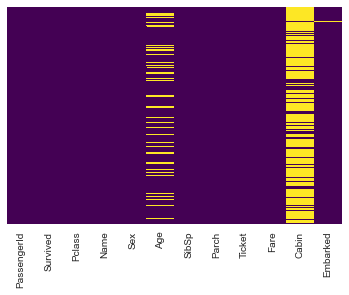

In [184]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

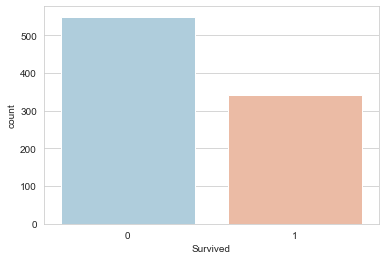

In [185]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=dataset, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

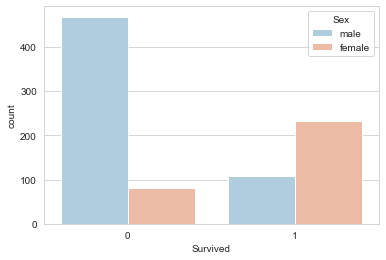

In [186]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=dataset, palette='RdBu_r')

In [187]:
def impute_age(cols):
    Age = cols[0]    
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [188]:
dataset['Age'] = dataset[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

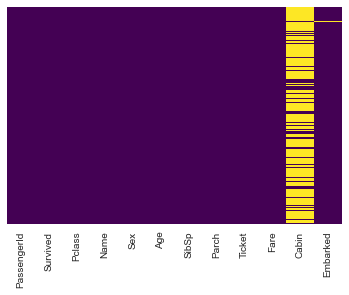

In [189]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [190]:
dataset.drop('Cabin',axis=1,inplace=True)

In [191]:
dataset.dropna(inplace=True)

<AxesSubplot:>

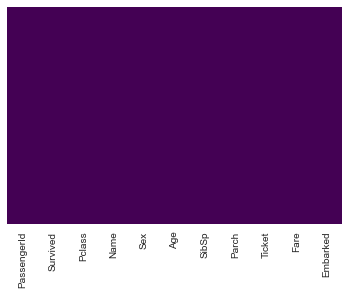

In [192]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [193]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True)
embark = pd.get_dummies(dataset['Embarked'], drop_first=True)


In [194]:
data2 = dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
print(data2)


None


In [182]:
dataset1 = pd.concat([data2, sex, embark], axis=1)
dataset1.head()

,male,Q,S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [151]:
from sklearn.model_selection import train_test_split

In [161]:
X = dataset1.drop('Survived', axis=1)
y = dataset1['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print(X_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
807          808       3  18.0      0      0   7.7750     0  0  1
651          652       2  18.0      0      1  23.0000     0  0  1
2              3       3  26.0      0      0   7.9250     0  0  1
690          691       1  31.0      1      0  57.0000     1  0  1
196          197       3  24.0      0      0   7.7500     1  1  0
..           ...     ...   ...    ...    ...      ...   ... .. ..
576          577       2  34.0      0      0  13.0000     0  0  1
840          841       3  20.0      0      0   7.9250     1  0  1
338          339       3  45.0      0      0   8.0500     1  0  1
524          525       3  24.0      0      0   7.2292     1  0  0
865          866       2  42.0      0      0  13.0000     0  0  1

[622 rows x 9 columns]


In [153]:
from sklearn.linear_model import LogisticRegression

In [155]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\NaniYash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [156]:
y_train.head()

807    0
651    1
2      1
690    1
196    0
Name: Survived, dtype: int64

In [164]:
predictionX = logmodel.predict(X)

In [165]:
dataset['prediction'] = predictionX

In [166]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,prediction
0,1,0,3,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,1,3,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,0,3,35.0,0,0,8.0500,0
